# 1. Importing Modules

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_theme(style="whitegrid")
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motorbikes-in-indian-market-2022/bikes.csv


# 2. Importing & Analysing Dataset

In [2]:
data= pd.read_csv(r'/kaggle/input/motorbikes-in-indian-market-2022/bikes.csv',index_col=0)
data

,Model Name,Price,CC,Mileage,Weight,Links
0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg,https://www.carandbike.com/royal-enfield-bikes...
1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg,https://www.carandbike.com/royal-enfield-bikes...
2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg,https://www.carandbike.com/royal-enfield-bikes...
3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg,https://www.carandbike.com/royal-enfield-bikes...
4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg,https://www.carandbike.com/hero-bikes/splendor...
...,...,...,...,...,...,...
3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg,https://www.carandbike.com/royal-enfield-bikes...
3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg,https://www.carandbike.com/yamaha-bikes/mt-15
3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg,https://www.carandbike.com/honda-bikes/dio
3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg,https://www.carandbike.com/honda-bikes/sp-125


## Dataset Analysis
- Model Name
    - In this column we have motorcyle brand name and model of the bike combined.
- Price 
    - In this column we have price of each model in indian rupees. Although data is in number but the dtype shows object because of the sign '₹'.
- CC 
    - In the column we have total displacement of an engine of the bike. This column is also of object datatype.
- Mileage
    - Mileage column shows the km/l number of a bike.
- Weight 
    - Weight column describes the weight.
- Links
    - Links for each bike for more details.

In [3]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 3588
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model Name  3589 non-null   object
 1   Price       3589 non-null   object
 2   CC          3533 non-null   object
 3   Mileage     3559 non-null   object
 4   Weight      3589 non-null   object
 5   Links       3589 non-null   object
dtypes: object(6)
memory usage: 196.3+ KB


Model Name    3589
Price         3589
CC            3533
Mileage       3559
Weight        3589
Links         3589
dtype: int64

# 3. Data Pre-Processing

## Data Cleaning

In [4]:
# Dropping "Links" Column

data.drop("Links",axis=1,inplace=True)
data

,Model Name,Price,CC,Mileage,Weight
0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg
1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg
2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg
3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg
4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg
...,...,...,...,...,...
3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg
3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg
3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg
3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg


In [5]:
# Displaying the Duplicates Records

data[data.duplicated()]

,Model Name,Price,CC,Mileage,Weight
12,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg
13,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg
14,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg
15,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg
16,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg
...,...,...,...,...,...
3584,Royal Enfield Classic 350,"₹ 1,84,374",349.0 CC,37 Km/l,195 Kg
3585,Yamaha MT-15,"₹ 1,44,900",155.0 CC,48 Km/l,138 Kg
3586,Honda Dio,"₹ 64,510",109.5 CC,55 Km/l,103 Kg
3587,Honda SP 125,"₹ 78,381",124.0 CC,65 Km/l,117 Kg


In [6]:
# Dropping the Duplicates Records

data.drop_duplicates(keep='first',inplace= True)
data.count()

Model Name    361
Price         361
CC            305
Mileage       331
Weight        361
dtype: int64

In [7]:
# Create a new column called "Brands" from an existing column "Model Name"

data['Brand']= data['Model Name'].apply(lambda model: model.split()[0])
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg,Royal
1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg,Royal
2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg,Royal
3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg,Royal
4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,"₹ 74,740",NaN,160 Km/Full Charge,85 Kg,22Kymco
369,Odysse Racer,"₹ 59,500",NaN,70 - 75 Km/Full Charge,100 Kg,Odysse
370,MV Agusta Brutale 1090,"₹ 21,02,268",1078.0 CC,15 Km/l,183 Kg,MV
371,BMW F900XR,"₹ 12,30,000",895.0 CC,24 Km/l,219 Kg,BMW


In [8]:
data['Brand']= data['Brand'].replace({'Royal':'Royal Enfield'})
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,"₹ 2,10,784",411.0 CC,45 Km/l,191 Kg,Royal Enfield
1,Royal Enfield Classic Chrome,"₹ 1,88,868",499.0 CC,27 Km/l,194 Kg,Royal Enfield
2,Royal Enfield Meteor 350,"₹ 2,05,844",349.0 CC,41.88 Km/l,183 Kg,Royal Enfield
3,Royal Enfield Bullet 350,"₹ 1,27,094",346.0 CC,45 Km/l,183 Kg,Royal Enfield
4,Hero Splendor +,"₹ 69,380",97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,"₹ 74,740",NaN,160 Km/Full Charge,85 Kg,22Kymco
369,Odysse Racer,"₹ 59,500",NaN,70 - 75 Km/Full Charge,100 Kg,Odysse
370,MV Agusta Brutale 1090,"₹ 21,02,268",1078.0 CC,15 Km/l,183 Kg,MV
371,BMW F900XR,"₹ 12,30,000",895.0 CC,24 Km/l,219 Kg,BMW


In [9]:
# Extracting values from "Price" column

data['Price']=data.Price.apply(lambda value: int(''.join(re.findall(r'\d+',value))))
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,210784,411.0 CC,45 Km/l,191 Kg,Royal Enfield
1,Royal Enfield Classic Chrome,188868,499.0 CC,27 Km/l,194 Kg,Royal Enfield
2,Royal Enfield Meteor 350,205844,349.0 CC,41.88 Km/l,183 Kg,Royal Enfield
3,Royal Enfield Bullet 350,127094,346.0 CC,45 Km/l,183 Kg,Royal Enfield
4,Hero Splendor +,69380,97.2 CC,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,74740,NaN,160 Km/Full Charge,85 Kg,22Kymco
369,Odysse Racer,59500,NaN,70 - 75 Km/Full Charge,100 Kg,Odysse
370,MV Agusta Brutale 1090,2102268,1078.0 CC,15 Km/l,183 Kg,MV
371,BMW F900XR,1230000,895.0 CC,24 Km/l,219 Kg,BMW


In [10]:
# Extracting values from "CC" column

data.loc[data.CC.notnull(),'CC']= data.loc[data.CC.notnull(),'CC'].apply(lambda cc: int(float(cc.split()[0])))
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,210784,411,45 Km/l,191 Kg,Royal Enfield
1,Royal Enfield Classic Chrome,188868,499,27 Km/l,194 Kg,Royal Enfield
2,Royal Enfield Meteor 350,205844,349,41.88 Km/l,183 Kg,Royal Enfield
3,Royal Enfield Bullet 350,127094,346,45 Km/l,183 Kg,Royal Enfield
4,Hero Splendor +,69380,97,70 Km/l,110 Kg,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,74740,NaN,160 Km/Full Charge,85 Kg,22Kymco
369,Odysse Racer,59500,NaN,70 - 75 Km/Full Charge,100 Kg,Odysse
370,MV Agusta Brutale 1090,2102268,1078,15 Km/l,183 Kg,MV
371,BMW F900XR,1230000,895,24 Km/l,219 Kg,BMW


In [11]:
# Extracting values from "Mileage" column


data.loc[data.Mileage.notnull(),"Mileage"]=data.loc[data.Mileage.notnull(),"Mileage"].apply(lambda ml:int(float(ml.split()[0])))
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,210784,411,45,191 Kg,Royal Enfield
1,Royal Enfield Classic Chrome,188868,499,27,194 Kg,Royal Enfield
2,Royal Enfield Meteor 350,205844,349,41,183 Kg,Royal Enfield
3,Royal Enfield Bullet 350,127094,346,45,183 Kg,Royal Enfield
4,Hero Splendor +,69380,97,70,110 Kg,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,74740,NaN,160,85 Kg,22Kymco
369,Odysse Racer,59500,NaN,70,100 Kg,Odysse
370,MV Agusta Brutale 1090,2102268,1078,15,183 Kg,MV
371,BMW F900XR,1230000,895,24,219 Kg,BMW


In [12]:
# Extracting values from "Weight" column

data["Weight"]=data.Weight.apply(lambda w:int(float(w.split()[0])))
data

,Model Name,Price,CC,Mileage,Weight,Brand
0,Royal Enfield Himalayan,210784,411,45,191,Royal Enfield
1,Royal Enfield Classic Chrome,188868,499,27,194,Royal Enfield
2,Royal Enfield Meteor 350,205844,349,41,183,Royal Enfield
3,Royal Enfield Bullet 350,127094,346,45,183,Royal Enfield
4,Hero Splendor +,69380,97,70,110,Hero
...,...,...,...,...,...,...
368,22Kymco Flow,74740,NaN,160,85,22Kymco
369,Odysse Racer,59500,NaN,70,100,Odysse
370,MV Agusta Brutale 1090,2102268,1078,15,183,MV
371,BMW F900XR,1230000,895,24,219,BMW


In [13]:
# Create a new column called "Electric" from an existing column "CC"

data["Electric"]=np.where(data.CC.isnull(),1,0) # 0- Non-Electric, 1- Electric
data

,Model Name,Price,CC,Mileage,Weight,Brand,Electric
0,Royal Enfield Himalayan,210784,411,45,191,Royal Enfield,0
1,Royal Enfield Classic Chrome,188868,499,27,194,Royal Enfield,0
2,Royal Enfield Meteor 350,205844,349,41,183,Royal Enfield,0
3,Royal Enfield Bullet 350,127094,346,45,183,Royal Enfield,0
4,Hero Splendor +,69380,97,70,110,Hero,0
...,...,...,...,...,...,...,...
368,22Kymco Flow,74740,NaN,160,85,22Kymco,1
369,Odysse Racer,59500,NaN,70,100,Odysse,1
370,MV Agusta Brutale 1090,2102268,1078,15,183,MV,0
371,BMW F900XR,1230000,895,24,219,BMW,0


## Missing Values

- After analysing the dataset we came to know that all the missing values in CC column, shows that there no CC value for the bikes and these bikes are elctric bikes as we can see in mileage column we have km/Full Charge instead of km/l

In [14]:
# Checking for missing values

data.isnull().sum()

Model Name     0
Price          0
CC            56
Mileage       30
Weight         0
Brand          0
Electric       0
dtype: int64

In [15]:
# Replacing NaN to 'N/A' in the "CC" column since we can't leave it empty and these values will not be considered for analysis

data.CC.fillna('N/A',inplace= True) 
data.CC.isnull().sum()

0

- After analysing the dataset we came to know that all the missing values in Mileage column, shows that there are no mileage value for the bikes and these bikes are elctric bikes as we can see in mileage column we have km/Full Charge instead of km/l

In [16]:
# Finding average mileage of electric bikes to fill the missing values in the "Mileage" column
# electric bikes mean :- 112 km/full charge approx
# non-electric bikes mean:- 32 km/l approx

data.groupby('Electric')['Mileage'].mean()

Electric
0     32.201439
1    111.981132
Name: Mileage, dtype: float64

In [17]:
# Replacing NaN to 112 in the "Mileage" column since we found out the average mileage of electric bikes is 112 km/full charge approx

data['Mileage']=data['Mileage'].fillna(112)
data.Mileage.isnull().sum()

0

In [18]:
# Finally checking whether ther are any missing values

data.isnull().sum()

Model Name    0
Price         0
CC            0
Mileage       0
Weight        0
Brand         0
Electric      0
dtype: int64

## Sorting Data

In [19]:
# Sorting the data in ascending order according to the "Model Name" column

data.sort_values(by ='Model Name', ascending = 1,inplace=True)
data

,Model Name,Price,CC,Mileage,Weight,Brand,Electric
368,22Kymco Flow,74740,N/A,160,85,22Kymco,1
233,Ampere Magnus,45999,N/A,45,94,Ampere,1
285,Ampere Magnus Pro,79966,N/A,75,94,Ampere,1
198,Ampere Reo,44838,N/A,45,70,Ampere,1
351,Ampere Reo Elite,47264,N/A,55,68,Ampere,1
...,...,...,...,...,...,...,...
55,Yamaha YZF R1,2039233,998,20,200,Yamaha,0
54,Yamaha YZF R15 V4.0,170800,155,45,142,Yamaha,0
169,Yezdi Adventure,209900,334,112,188,Yezdi,0
100,Yezdi Roadster,198142,334,112,184,Yezdi,0


In [20]:
# Resetting the index locations since the indices is not changed because of sorting

data.reset_index(drop=True,inplace=True)
data

,Model Name,Price,CC,Mileage,Weight,Brand,Electric
0,22Kymco Flow,74740,N/A,160,85,22Kymco,1
1,Ampere Magnus,45999,N/A,45,94,Ampere,1
2,Ampere Magnus Pro,79966,N/A,75,94,Ampere,1
3,Ampere Reo,44838,N/A,45,70,Ampere,1
4,Ampere Reo Elite,47264,N/A,55,68,Ampere,1
...,...,...,...,...,...,...,...
356,Yamaha YZF R1,2039233,998,20,200,Yamaha,0
357,Yamaha YZF R15 V4.0,170800,155,45,142,Yamaha,0
358,Yezdi Adventure,209900,334,112,188,Yezdi,0
359,Yezdi Roadster,198142,334,112,184,Yezdi,0


In [21]:
# Rearranging all the columns in order

data= data[['Brand','Model Name','Electric','CC','Price','Mileage','Weight']]
data

,Brand,Model Name,Electric,CC,Price,Mileage,Weight
0,22Kymco,22Kymco Flow,1,N/A,74740,160,85
1,Ampere,Ampere Magnus,1,N/A,45999,45,94
2,Ampere,Ampere Magnus Pro,1,N/A,79966,75,94
3,Ampere,Ampere Reo,1,N/A,44838,45,70
4,Ampere,Ampere Reo Elite,1,N/A,47264,55,68
...,...,...,...,...,...,...,...
356,Yamaha,Yamaha YZF R1,0,998,2039233,20,200
357,Yamaha,Yamaha YZF R15 V4.0,0,155,170800,45,142
358,Yezdi,Yezdi Adventure,0,334,209900,112,188
359,Yezdi,Yezdi Roadster,0,334,198142,112,184


In [22]:
# Rechecking the datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       361 non-null    object
 1   Model Name  361 non-null    object
 2   Electric    361 non-null    int64 
 3   CC          361 non-null    object
 4   Price       361 non-null    int64 
 5   Mileage     361 non-null    int64 
 6   Weight      361 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 19.9+ KB


# 4. Data Analysis

## Brands with Total Number of Bike Models

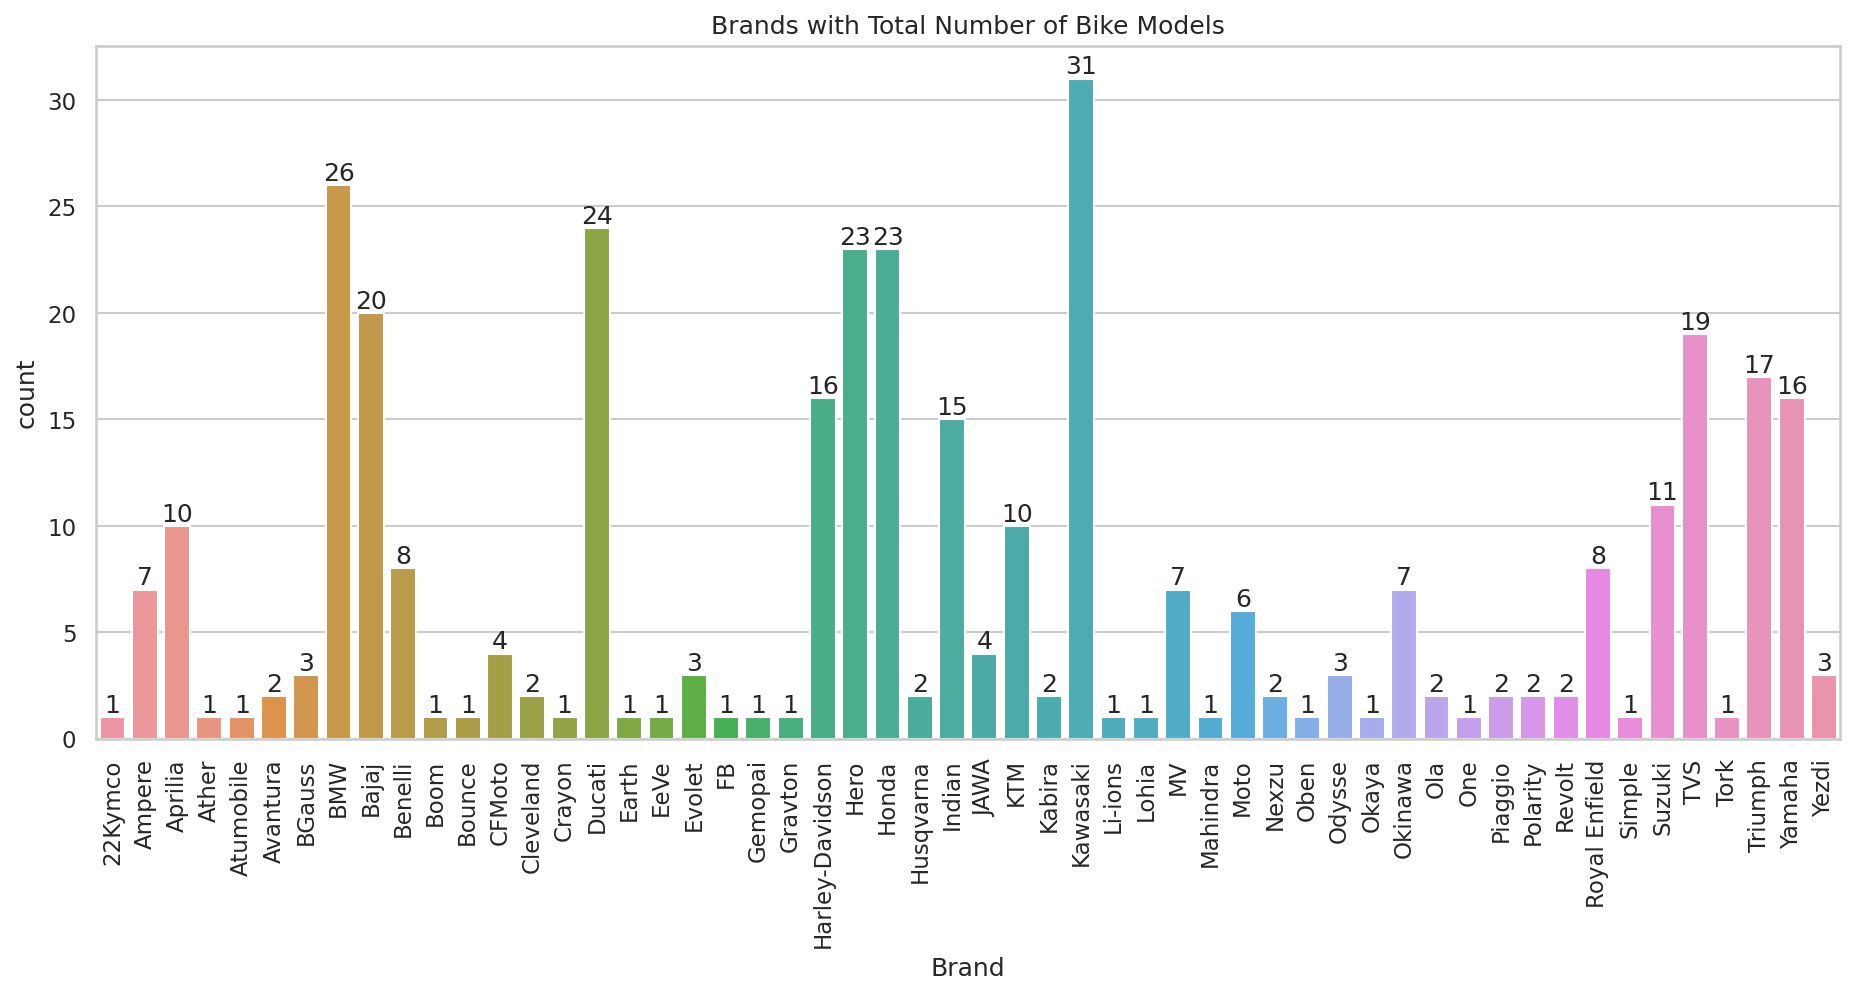

In [23]:
plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(data= data,x=data['Brand'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title("Brands with Total Number of Bike Models")
plt.show()

## Brands with Total Number of Electric-Bike Models

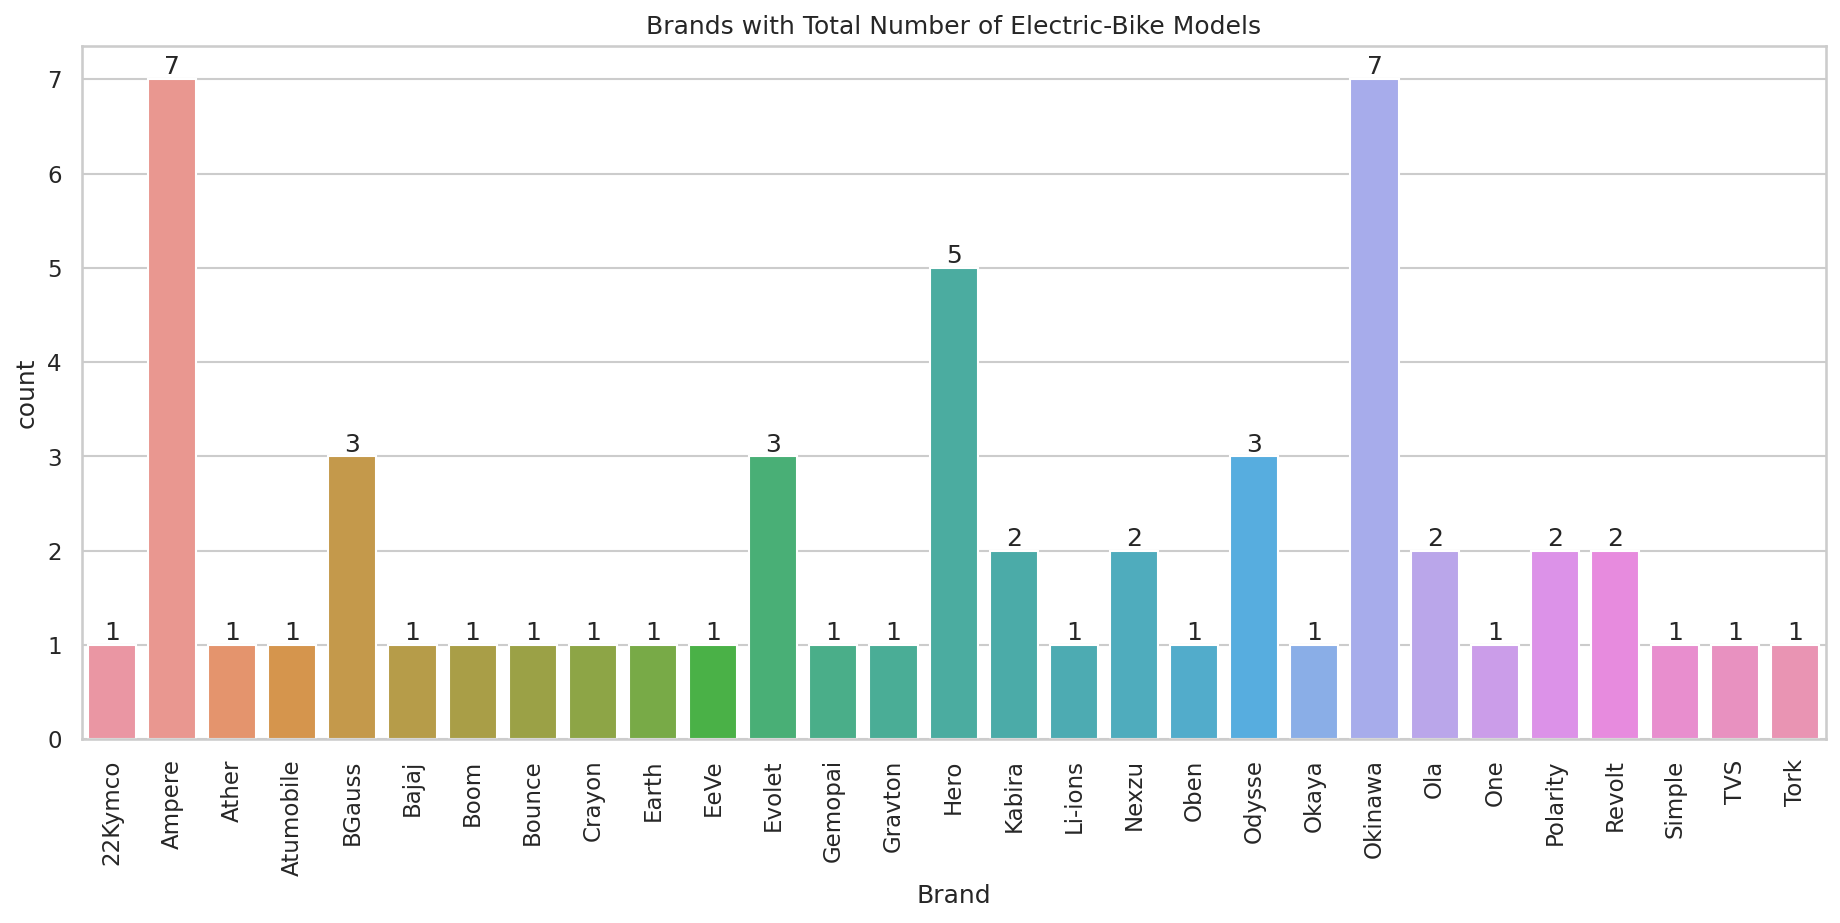

In [24]:
plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(data= data[data['Electric']==1],x='Brand')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title("Brands with Total Number of Electric-Bike Models")
plt.show()

## Total Number of Electric and Non-Electric Bike Models

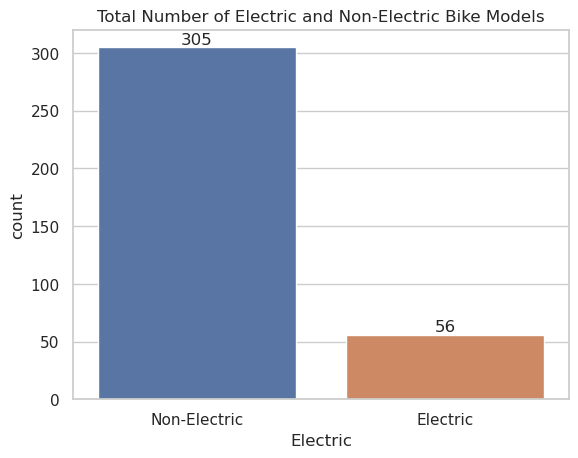

In [25]:
ax=sns.countplot(data=data, x="Electric")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks([0,1],['Non-Electric','Electric'])
plt.title("Total Number of Electric and Non-Electric Bike Models")
plt.show()

## Correlation Heatmap of the Dataset

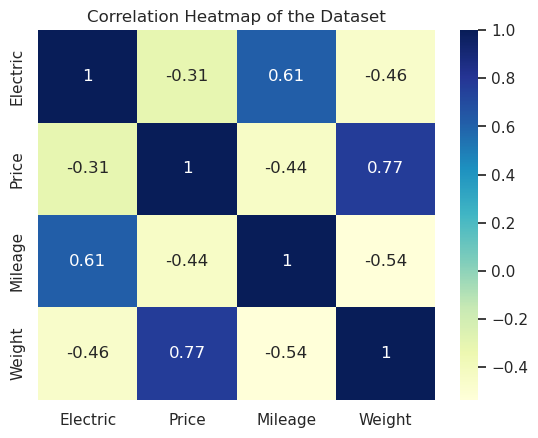

In [26]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of the Dataset")
plt.show()

## Distribution of Bikes W.R.T CC

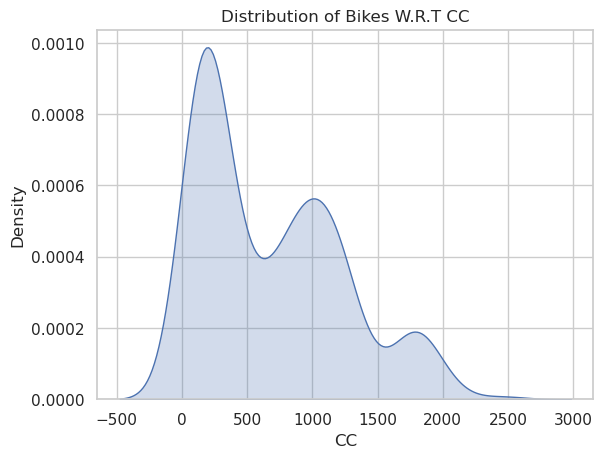

In [27]:
sns.kdeplot(data= data[data['Electric']==0], x= 'CC',fill=True)
plt.title("Distribution of Bikes W.R.T CC")
plt.show()

## Correlation Between CC & Mileage

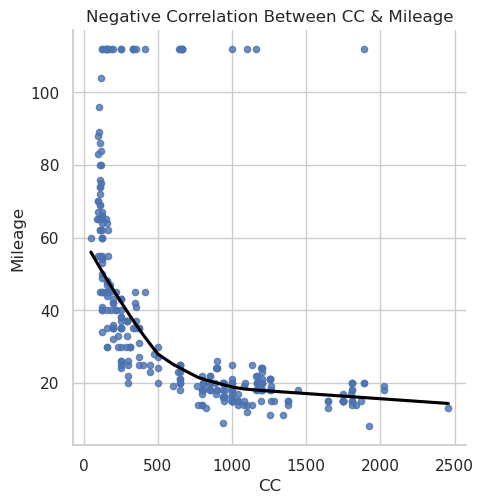

In [28]:
sns.lmplot(data=data[data['Electric']==0],x="CC",y="Mileage",lowess=True, line_kws={"color": "Black"}, scatter_kws={"s": 20})
plt.title("Negative Correlation Between CC & Mileage")
plt.show()

## Correlation Between Weight & Mileage

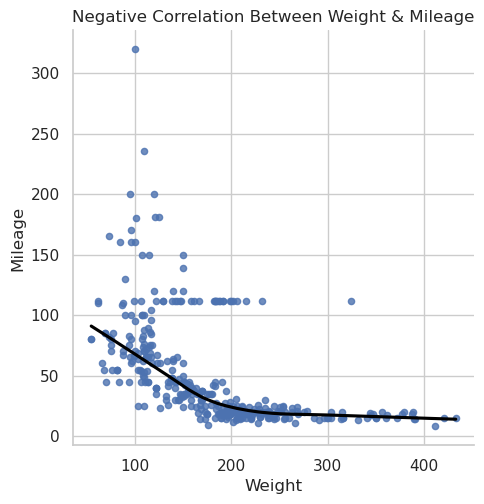

In [29]:
sns.lmplot(data=data,x="Weight",y="Mileage",lowess=True, line_kws={"color": "black"}, scatter_kws={"s": 20})
plt.title("Negative Correlation Between Weight & Mileage")
plt.show()

## Correlation Between CC & Price

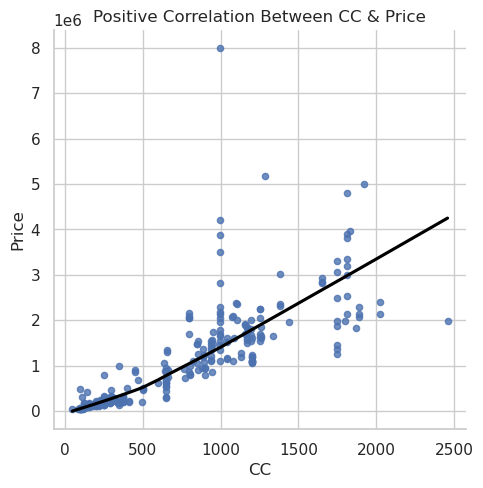

In [30]:
sns.lmplot(data=data[data['Electric']==0],x="CC",y="Price",lowess=True, line_kws={"color": "black"}, scatter_kws={"s": 20})
plt.title("Positive Correlation Between CC & Price")
plt.show()

## Correlation Between CC & Weight

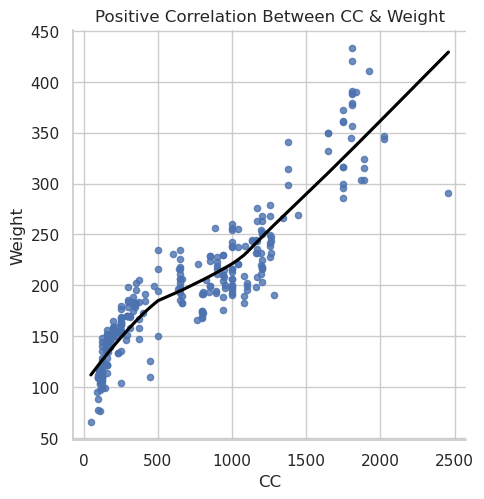

In [31]:
sns.lmplot(data=data[data['Electric']==0],x="CC",y="Weight",lowess=True, line_kws={"color": "Black"}, scatter_kws={"s": 20})
plt.title("Positive Correlation Between CC & Weight")
plt.show()

## Top 10 Bike Brands

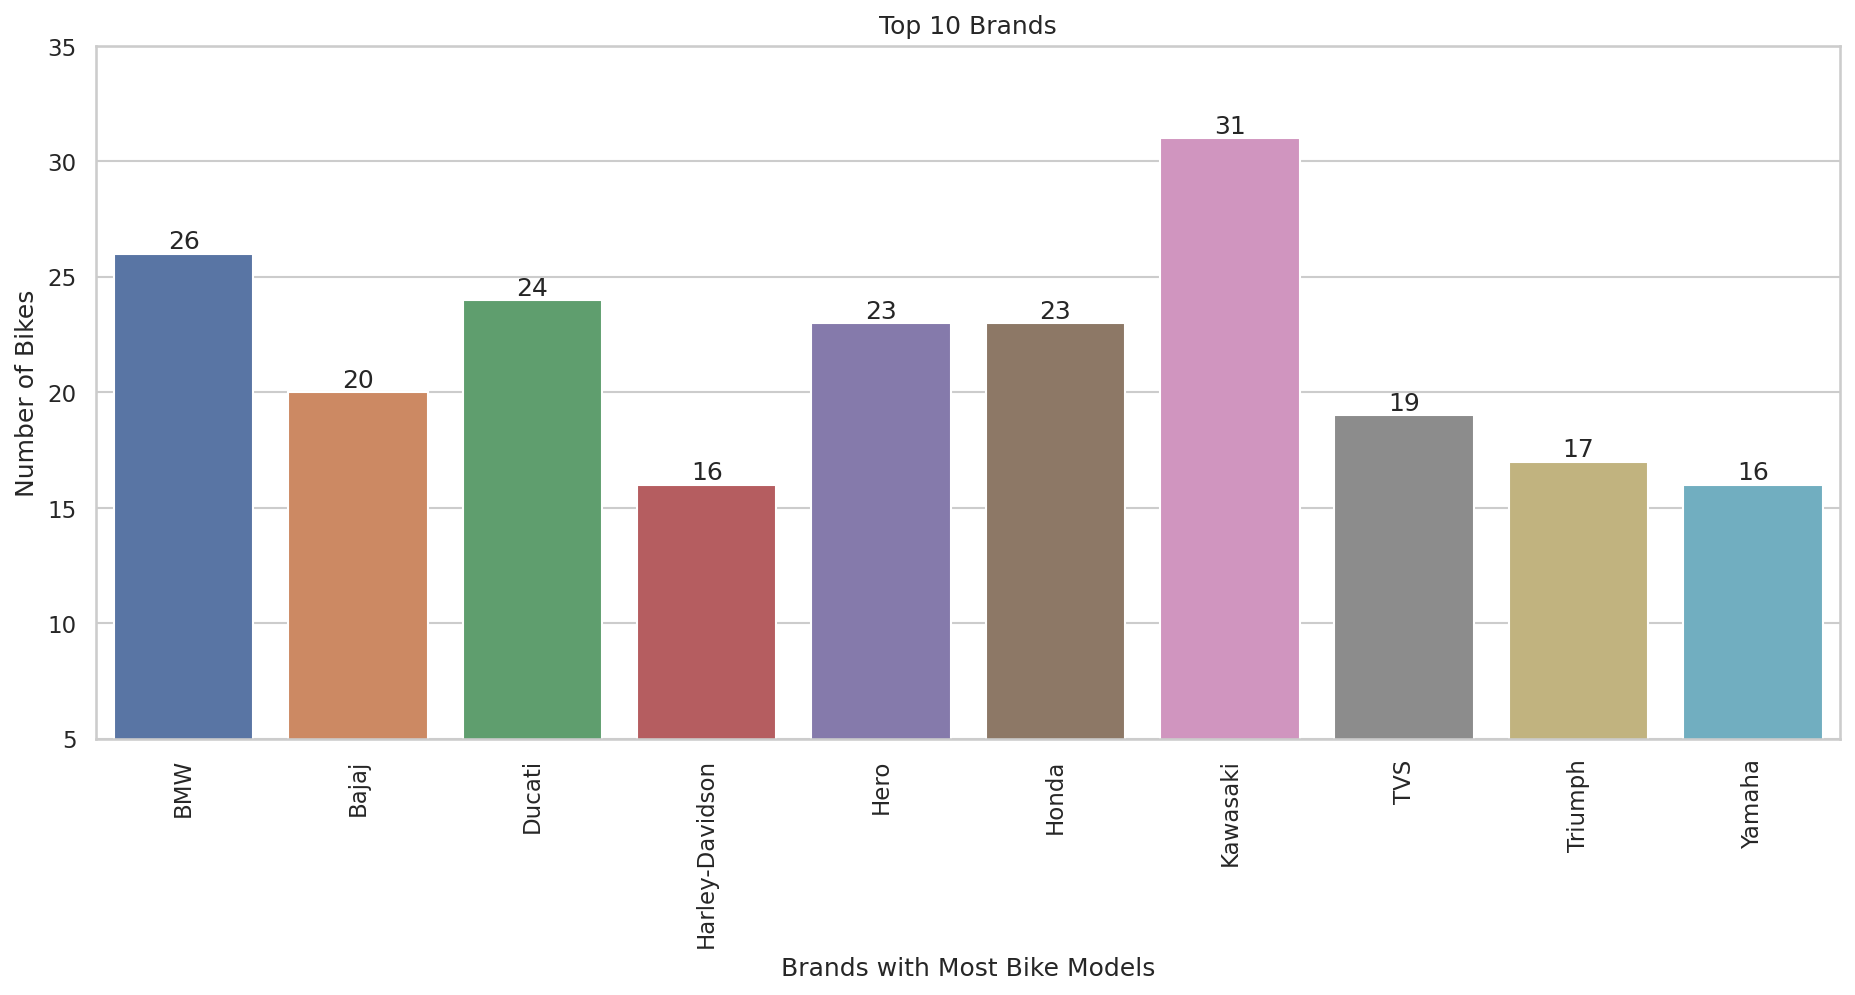

In [32]:
top10Brand= data['Brand'].value_counts().head(10)

plt.figure(figsize=(15,6),dpi=150)
ax=sns.countplot(x= data.loc[data['Brand'].isin(top10Brand.index),'Brand'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(5,35)
plt.xlabel("Brands with Most Bike Models")
plt.xticks(rotation=90)
plt.ylabel('Number of Bikes')
plt.title("Top 10 Brands")
plt.show()

## Top 10 Brands with Great Mileage

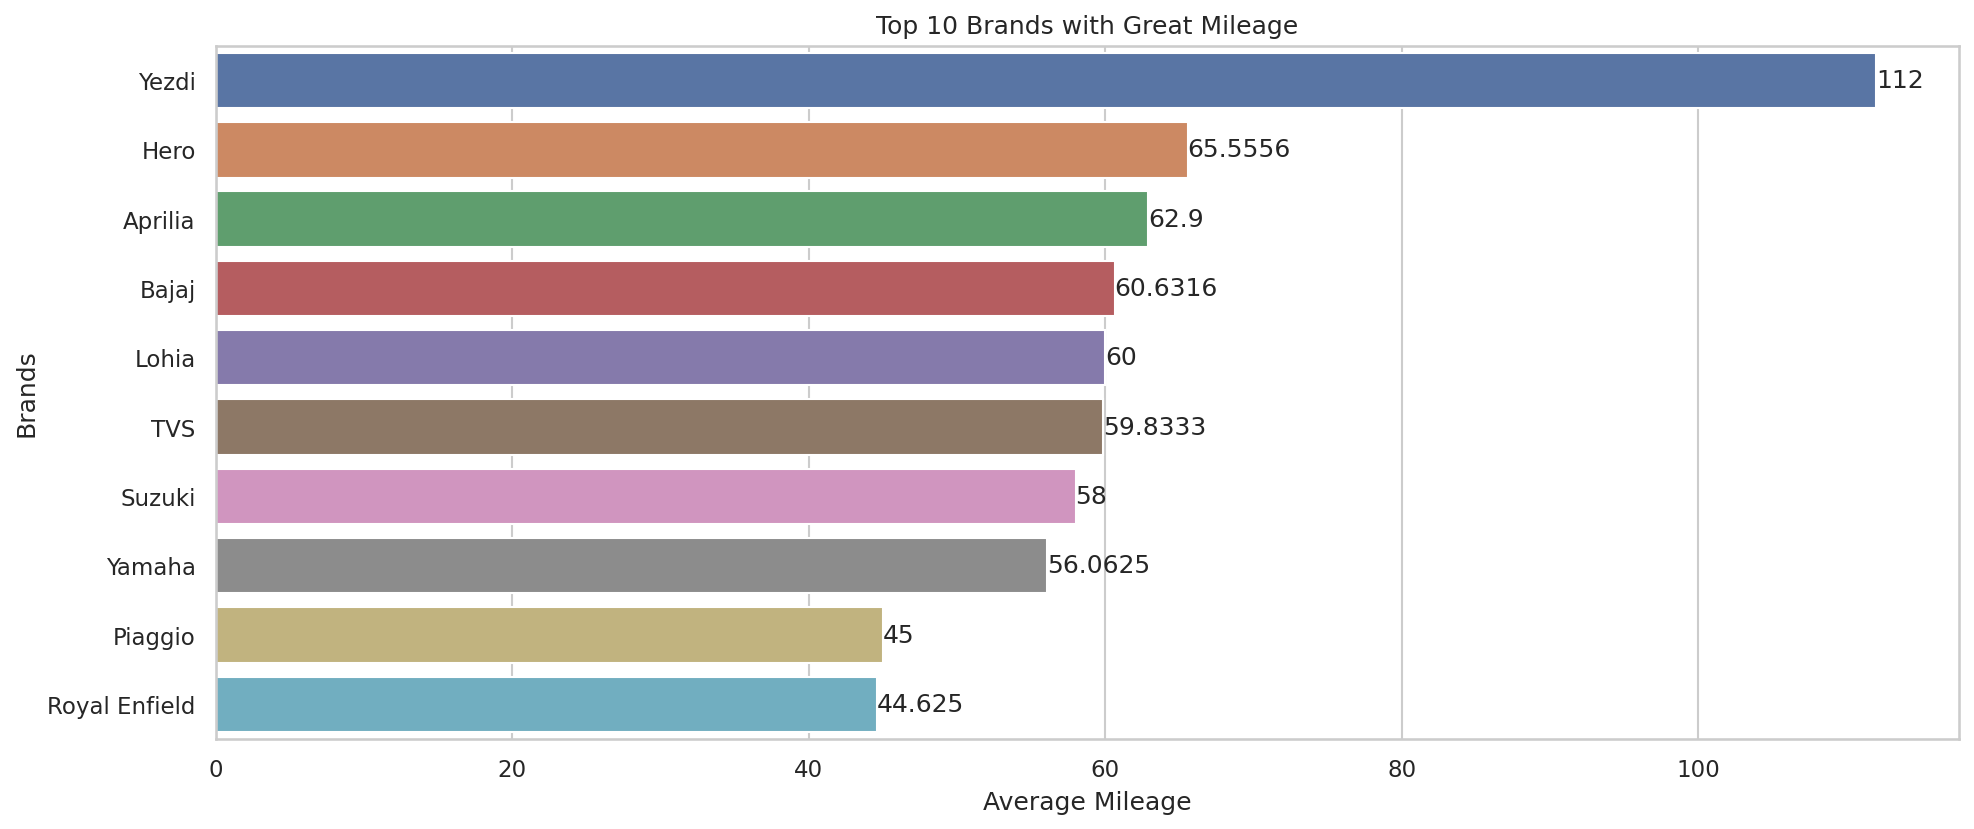

In [33]:
top10Mileage= data[data['Electric']==0].groupby('Brand')['Mileage'].mean().nlargest(10)

plt.figure(figsize=(15,6),dpi=150)
ax= sns.barplot(y=top10Mileage.index,x= top10Mileage.values,orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Brands")
plt.xlabel('Average Mileage')
plt.title("Top 10 Brands with Great Mileage")
plt.show()

## Top 10 Bikes with Great CC

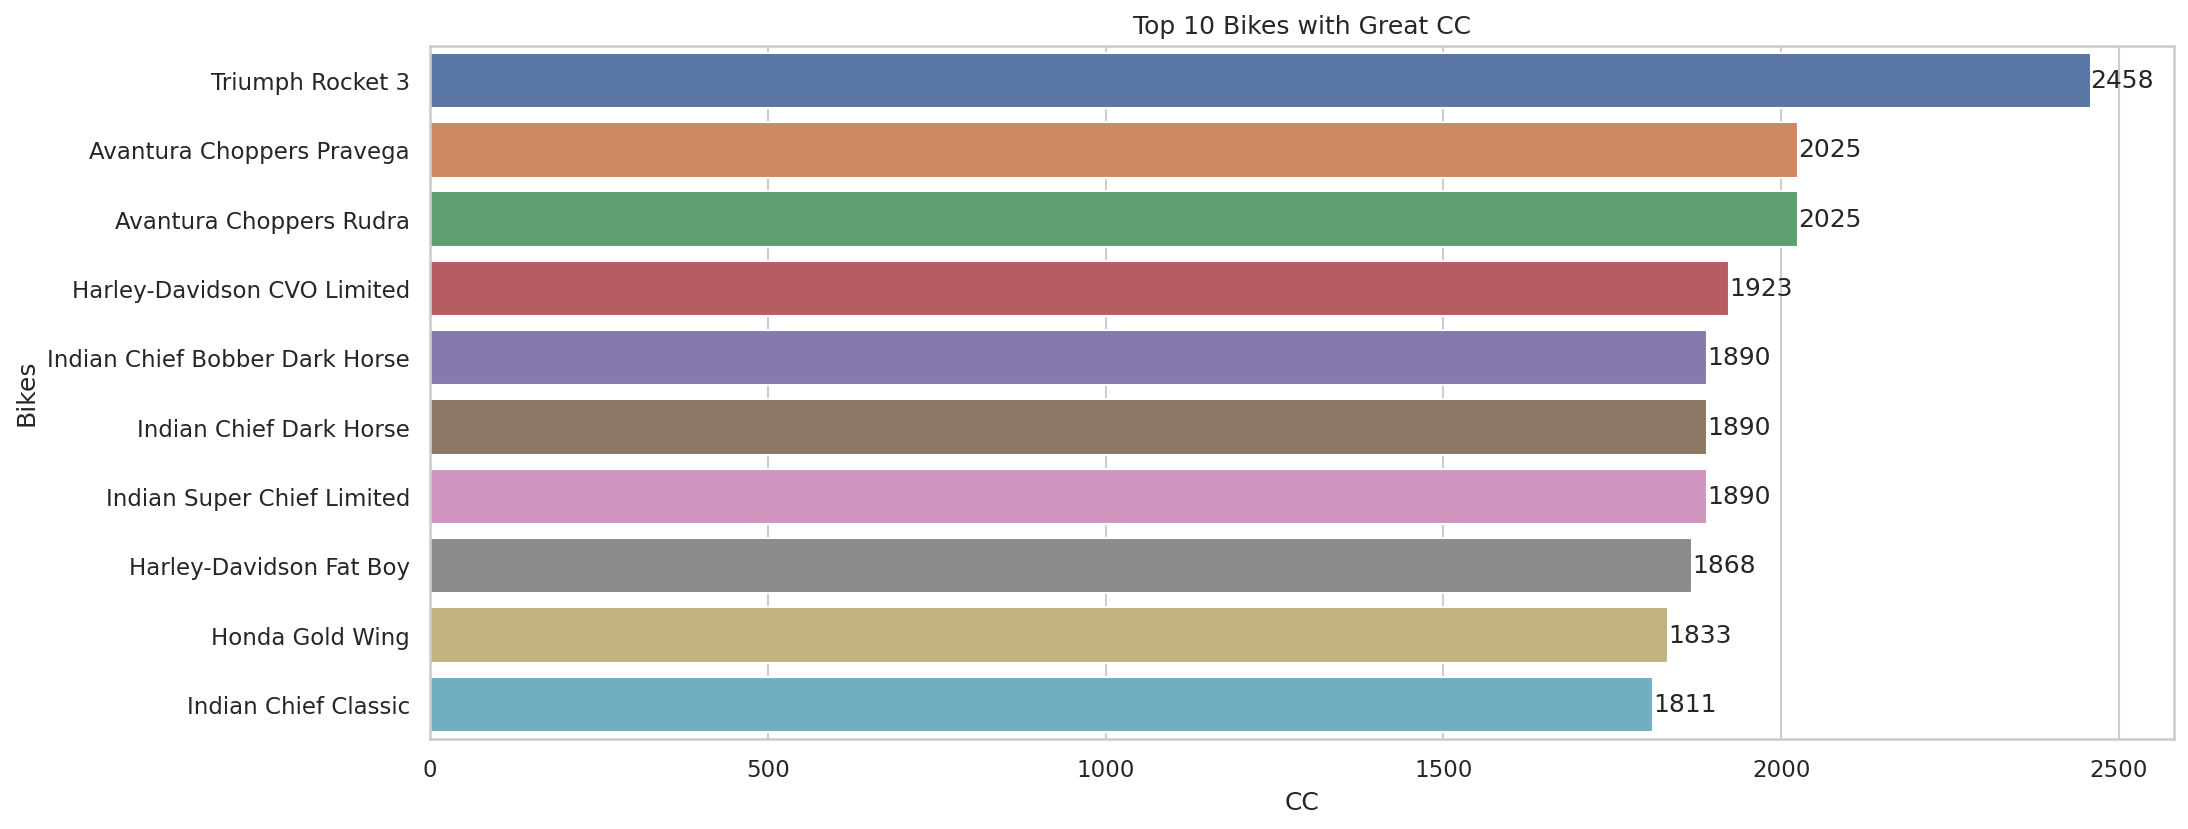

In [34]:
top10CCBikes=data[data['Electric']==0].groupby('Model Name')['CC'].mean().nlargest(10)

plt.figure(figsize=(15,6),dpi=150)
ax= sns.barplot(y=top10CCBikes.index,x= top10CCBikes.values,orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Bikes")
plt.xlabel('CC')
plt.title("Top 10 Bikes with Great CC")
plt.show()

## Top 10 Cheapest Bikes

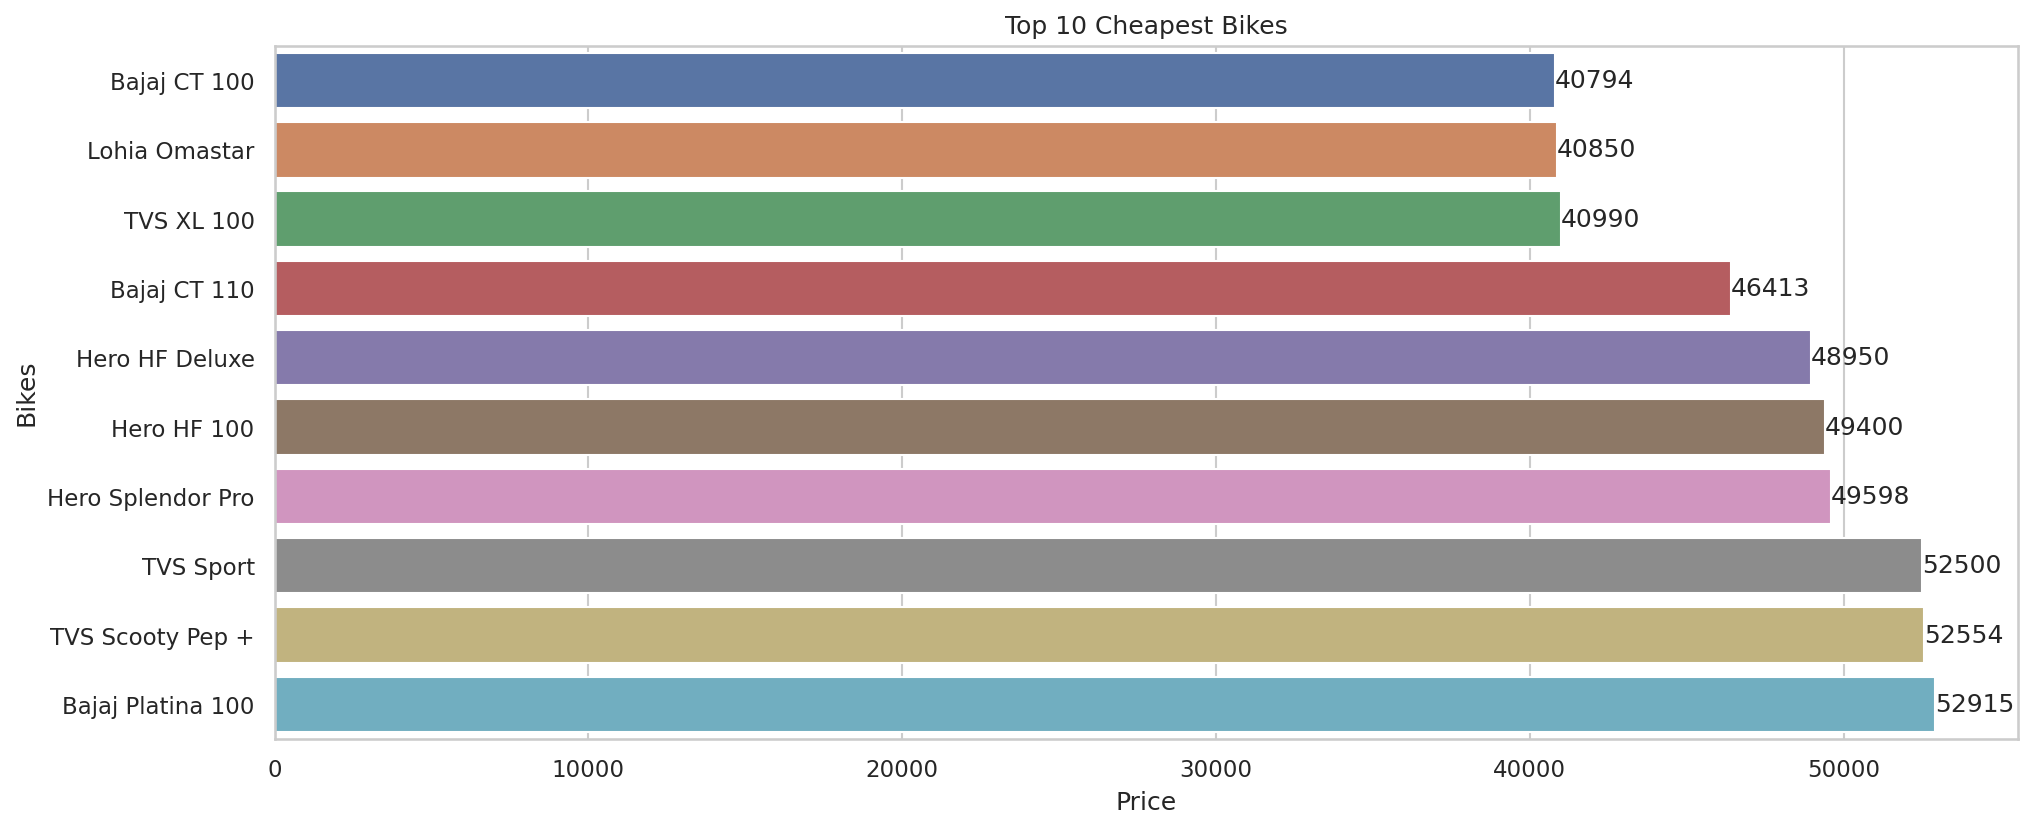

In [35]:
top10cheapBikes=data[data['Electric']==0].groupby('Model Name')['Price'].mean().nsmallest(10)

plt.figure(figsize=(15,6),dpi=150)
ax= sns.barplot(y=top10cheapBikes.index,x= top10cheapBikes.values,orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Bikes")
plt.xlabel('Price')
plt.title("Top 10 Cheapest Bikes")
plt.show()

### So, We have come to an end, Follow and Upvote If like this EDA
### Thank You !